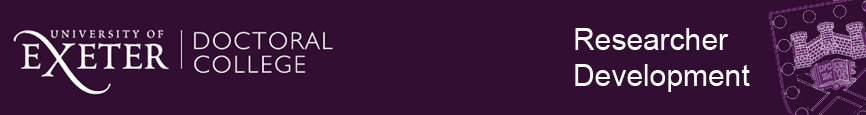

In [1]:
# Ignore this code; it's only here to display the image below
from IPython.display import Image
Image("../images/logo.jpg")

# Python for scientific research
# Functions, modules and packages

### John Joseph Valletta
### University of Exeter, Penryn Campus, UK
### June 2017

# Introduction
Python code is organised in a hierarchical fashion:

* **Functions**: Encapsulate Python code into a reusable function; given a set of input *arguments* a function returns an output
* **Modules**: Encapsulate several related functions which we can use in other programs without the need to redefine them
* **Package**: Encapsulate related modules together 

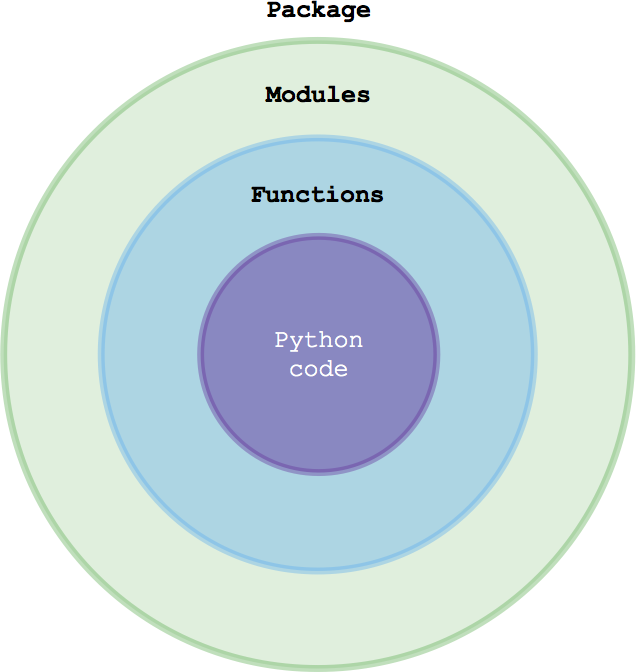

In [2]:
# Ignore this code; it's only here to display the image below
from IPython.display import Image
Image("../images/package.png")

# Functions
Let us get accustomed to writing functions by using a number of simple examples. 

**Note**
* Writing functions is central to any programming language, hence practice doing so until it becomes second nature
* As mentioned previously, unlike other programming languages, Python *does not* use curly brackets { } at the start and end of the function; **indentation** is everything
* Always **document** your functions 

In [3]:
def mysum(x, y):
    """
    Return the sum of two numbers
    
    Parameters
    ----------
    x : an integer or float
    y : an integer or float
    
    Returns 
    -------
    The sum of x and y
    """
    return x + y

In [4]:
# Call function
mysum(5.2, 10)

15.2

We can display the documentation string by using the `help()` function (this is why it is important to include a documentation string) 

In [5]:
help(mysum)

Help on function mysum in module __main__:

mysum(x, y)
    Return the sum of two numbers
    
    Parameters
    ----------
    x : an integer or float
    y : an integer or float
    
    Returns 
    -------
    The sum of x and y



When writing long and complex functions, it is common to assign *default* values for some of the input arguments. This is useful because we do not need to specify a value for every parameter, *but* when we want to we can.

In the previous practical we wrote a function to compute the GC content of a DNA sequence. Suppose that sometimes we also want to compute the AT content of that sequence; we can set GC to be a *default* parameter.

In [6]:
def content(DNA, ntides="gc"):
    """
    Returns the percentage nucleotide content of a DNA sequence 
    
    Parameters
    ----------
    DNA : a string of nucleotides e.g "acgtgtaccgt"
    ntides : a pair of nucleotides e.g "gc"
    
    Returns 
    -------
    The percentage nucleotides content of a DNA sequence
    """
    content1 = DNA.count(ntides[0]) # count g's for example
    content2 = DNA.count(ntides[1]) # count c's for example
        
    return ((content1 + content2)/len(DNA))*100

In [7]:
# Call with default parameter
content("gacgcgatagctagctagagcat")

52.17391304347826

In [8]:
# Call with a different ntides arguments
content("gacgcgatagctagctagagcat", "at")

47.82608695652174

Note how this function is not doing any error checking, i.e we are assuming that the user will: 
1. input a string
2. the string *only* contains `a, c, g` or `t`
3. ntides contains *only* two characters taken from the set `a, c, g` or `t`

So in practice when writing functions, the first part would be devouted to error checking, using the flow control statements presented in the previous lecture.

## Exercise 1
1. Reproduce the `find_motif()` function presented in the lecture. Make sure you understand every statement in that code. Use the `help()` function to display the documentation string
2. Play around with different default values for `motif` and call the function by:
    * argument order/position
    * argument keyword
    * using default arguments
3. For the biologists amongst you, write a function to return the complement of a DNA sequence. That is, if the input is `"acgt"` the function returns `"tgca"`. Similarly return the reverse complement of a DNA sequence.

**Hint 1**: Use a dictionary to specify which character is swapped with what:

`compDict = {'a': 't', 'c': 'g', 'g': 'c', 't': 'a'} # i.e 'c' should be swapped with 'g' etc.`

Then use a list comprehension to loop through each character in your string and convert to its complement using the dictionary.

**Hint 2**: To reverse a string/list use the slice operator `[::-1]`

# Modules
Modules let us group related functions together, which we can then reuse in other progams

## Exercise 2
1. Copy the previously defined functions `content()` and `find_motif()` to a text file and save it as `dna_utils.py`
2. In a separate script, import the newly created module `dna_utils` and call the two functions. We can do this in two ways:

In [9]:
# Option A: Access functions from the "dna_utils" module using the '.' notation
import dna_utils

DNA = "gacgcggaatcaatagctaggaatcactagagcat"
dna_utils.content(DNA)

45.714285714285715

In [10]:
dna_utils.find_motif(DNA)

[6, 20]

In [11]:
# Option B: Import only the functions you need
from dna_utils import content, find_motif

content(DNA)

45.714285714285715

In [12]:
find_motif(DNA)

[6, 20]

**NOTE**: When you import a module, Python *caches* it in memory. This means that if you try to import the *same* module again it will just use what's already in the cache. This is great news as it speeds things up, especially if the same module is imported by several other modules. However, what this means is that if you do any changes to your module, those changes won't take affect, as Python would still be using the cached version. To circumvent this we need to reload the module. This is frequently done when testing and debugging a module.

In [13]:
# Let's say I wrote a new function in dna_utils
import dna_utils # just by running this command I won't have access to the new function, I have to reload the module 

# Reload the module
import importlib
importlib.reload(dna_utils) # reload the module dna_utils

# Now I can call my new function in dna_utils

<module 'dna_utils' from '/Users/jjv207/PythonWorkshop/03_FunctionsModules/dna_utils.py'>

# Package
A package is simply a group of related modules. Using the `from ... import ...` command you can import all/some modules of a package and all/some functions from those modules. Here we will introduce popular Python packages which are included in most installations, like Anaconda which you are all using.

**Note**
* Essentially importing a module or a package is the same, the only difference is that packages require a bit more work to create, as opposed to a module which is simply a `.py` file. Packages require an `__init__.py` file and a folder structure which has the same name as the module's name. Unfortunately we do not have enough time to go through this in detail. For now what is important is to learn how to access and use packages.
* Python packages are equivalent to MATLAB toolboxes and R libraries

## sys
The `sys` (system) package let us access various system related parameters. Some of these parameters are useful to keep note of for reproducibility reasons. 

In [14]:
import sys

sys.version # the version of Python we are using

'3.6.0 |Anaconda custom (x86_64)| (default, Dec 23 2016, 13:19:00) \n[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]'

In [15]:
sys.path # system paths that Python uses to search for packages/modules

['',
 '/Applications/anaconda/envs/Python3/lib/python36.zip',
 '/Applications/anaconda/envs/Python3/lib/python3.6',
 '/Applications/anaconda/envs/Python3/lib/python3.6/lib-dynload',
 '/Applications/anaconda/envs/Python3/lib/python3.6/site-packages',
 '/Applications/anaconda/envs/Python3/lib/python3.6/site-packages/Sphinx-1.5.1-py3.6.egg',
 '/Applications/anaconda/envs/Python3/lib/python3.6/site-packages/aeosa',
 '/Applications/anaconda/envs/Python3/lib/python3.6/site-packages/setuptools-27.2.0-py3.6.egg',
 '/Applications/anaconda/envs/Python3/lib/python3.6/site-packages/IPython/extensions',
 '/Users/jjv207/.ipython']

In [16]:
sys.executable # path for Python's interpreter

'/Applications/anaconda/envs/Python3/bin/python'

## os
The `os` (operating system) module let us access various operating system related parameters

In [17]:
import os

In [18]:
os.getcwd() # get current working directory

'/Users/jjv207/PythonWorkshop/03_FunctionsModules'

In [19]:
os.chdir("/Users/jjv207/PythonWorkshop/03_FunctionsModules") # change working directory

In [20]:
# join directory/file paths
# this is very useful because Windows and Mac/Linux use a different delimeter for paths (i.e back or forward slash)
# using this function will make your code portable across operating systems
os.path.join("/Users/jjv207/PythonWorkshop", "03_FunctionsModules")

'/Users/jjv207/PythonWorkshop/03_FunctionsModules'